In [ ]:
import dask.dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
urls = {
    'CollisionRecords': 'https://firebasestorage.googleapis.com/v0/b/aiq-bot.appspot.com/o/20210604_CollisionRecords.txt?alt=media&token=782c69aa-081b-421d-8399-a3e028bd643b',
    'PartyRecords': 'https://firebasestorage.googleapis.com/v0/b/aiq-bot.appspot.com/o/20210604_PartyRecords.txt?alt=media&token=b26667a0-3fdf-4c19-ae9f-2c3e3799bc92',
    'VictimRecords': 'https://firebasestorage.googleapis.com/v0/b/aiq-bot.appspot.com/o/20210604_VictimRecords.txt?alt=media&token=e56a2905-34b2-49a9-9d48-6ed5b9f4f753'
}

In [ ]:
dtype={'PCF_VIOL_CATEGORY': 'float64',
       'COLLISION_SEVERITY': 'object'}

collision_raw = dd.read_csv(urls['CollisionRecords'], usecols=['CASE_ID', 'ACCIDENT_YEAR', 'COLLISION_DATE', 'COLLISION_TIME', 'DAY_OF_WEEK',
     'PRIMARY_RD', 'SECONDARY_RD', 'PCF_VIOL_CATEGORY', 'TYPE_OF_COLLISION'], na_values=["-", "- "], dtype=dtype)

In [ ]:
collisions_df = collision_raw.copy()

In [ ]:
collisions_df['COLLISION_TIME'] = collisions_df['COLLISION_TIME'].astype(str)

# Function to format the time string
def format_time(time_str):
  if pd.isna(time_str):  # Check for missing values
    return time_str
  if len(time_str) == 3:
    return '0' + time_str
  elif len(time_str) == 2:
    return '00' + time_str
  return time_str

collisions_df['COLLISION_TIME'] = collisions_df['COLLISION_TIME'].apply(format_time)
collisions_df['COLLISION_DATE'] = dd.to_datetime(collisions_df['COLLISION_DATE'], format='%Y%m%d', errors='coerce')
collisions_df['COLLISION_TIME'] = dd.to_datetime(collisions_df['COLLISION_TIME'], format='%H%M', errors='coerce')
collisions_df['COLLISION_DATETIME'] = dd.to_datetime(
    collisions_df['COLLISION_DATE'].dt.strftime('%Y-%m-%d') + ' ' + collisions_df['COLLISION_TIME'].dt.strftime('%H:%M:%S')
)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/core.py:4448: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('COLLISION_TIME', 'object'))

  warnings.warn(meta_warning(meta))


In [ ]:
# Dictionary to map day numbers to names
day_mapping = {
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday',
    7: 'Sunday'
}

collisions_df['DAY_OF_WEEK'] = collisions_df['DAY_OF_WEEK'].map(day_mapping)
collisions_df.tail(1000)

,CASE_ID,ACCIDENT_YEAR,COLLISION_DATE,COLLISION_TIME,DAY_OF_WEEK,PRIMARY_RD,SECONDARY_RD,PCF_VIOL_CATEGORY,TYPE_OF_COLLISION,COLLISION_DATETIME
201758,9268910,2021,2021-04-23,1900-01-01 15:37:00,Friday,C ST,10TH ST,3.0,E,2021-04-23 15:37:00
201759,9268911,2021,2021-04-28,1900-01-01 14:51:00,Wednesday,GRAPEVINE RD,DATE ST,9.0,C,2021-04-28 14:51:00
201760,9268912,2021,2021-04-17,1900-01-01 21:13:00,Saturday,ROBINWOOD AV,BUNDY AV,8.0,B,2021-04-17 21:13:00
201761,9268913,2021,2021-04-09,1900-01-01 14:50:00,Friday,ARCARO DR,SWEEPSTAKES DR,3.0,B,2021-04-09 14:50:00
201762,9268914,2021,2021-04-20,1900-01-01 16:20:00,Tuesday,OAKDALE RD,COLONY MANOR DR,3.0,B,2021-04-20 16:20:00
...,...,...,...,...,...,...,...,...,...,...
202753,9271440,2021,2021-04-27,1900-01-01 21:42:00,Tuesday,AIRPORT WY,HARDING WY,12.0,D,2021-04-27 21:42:00
202754,9271441,2021,2021-03-29,1900-01-01 17:20:00,Monday,PACIFIC AV,BENJAMIN HOLT DR,3.0,B,2021-03-29 17:20:00
202755,9271445,2021,2021-04-29,1900-01-01 15:01:00,Thursday,PACIFIC AV,TUXEDO CT,3.0,C,2021-04-29 15:01:00
202756,9277562,2021,2021-04-01,1900-01-01 20:23:00,Thursday,STEVENS CREEK BL,CLOVIS AV,3.0,C,2021-04-01 20:23:00


In [ ]:
collisions_df_storage = collisions_df.compute() # Convert dd dataframe to pd dataframe

In [ ]:
collisions_df_storage.info() # List of all current columns

<class 'pandas.core.frame.DataFrame'>
Index: 5293361 entries, 0 to 202757
Data columns (total 10 columns):
 #   Column              Dtype         
---  ------              -----         
 0   CASE_ID             int64         
 1   ACCIDENT_YEAR       int64         
 2   COLLISION_DATE      datetime64[ns]
 3   COLLISION_TIME      datetime64[ns]
 4   DAY_OF_WEEK         string        
 5   PRIMARY_RD          string        
 6   SECONDARY_RD        string        
 7   PCF_VIOL_CATEGORY   float64       
 8   TYPE_OF_COLLISION   string        
 9   COLLISION_DATETIME  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(2), string(4)
memory usage: 516.3 MB


In [ ]:
# Run this to reinitiate collisions_df

collisions_df = collisions_df_storage.copy()

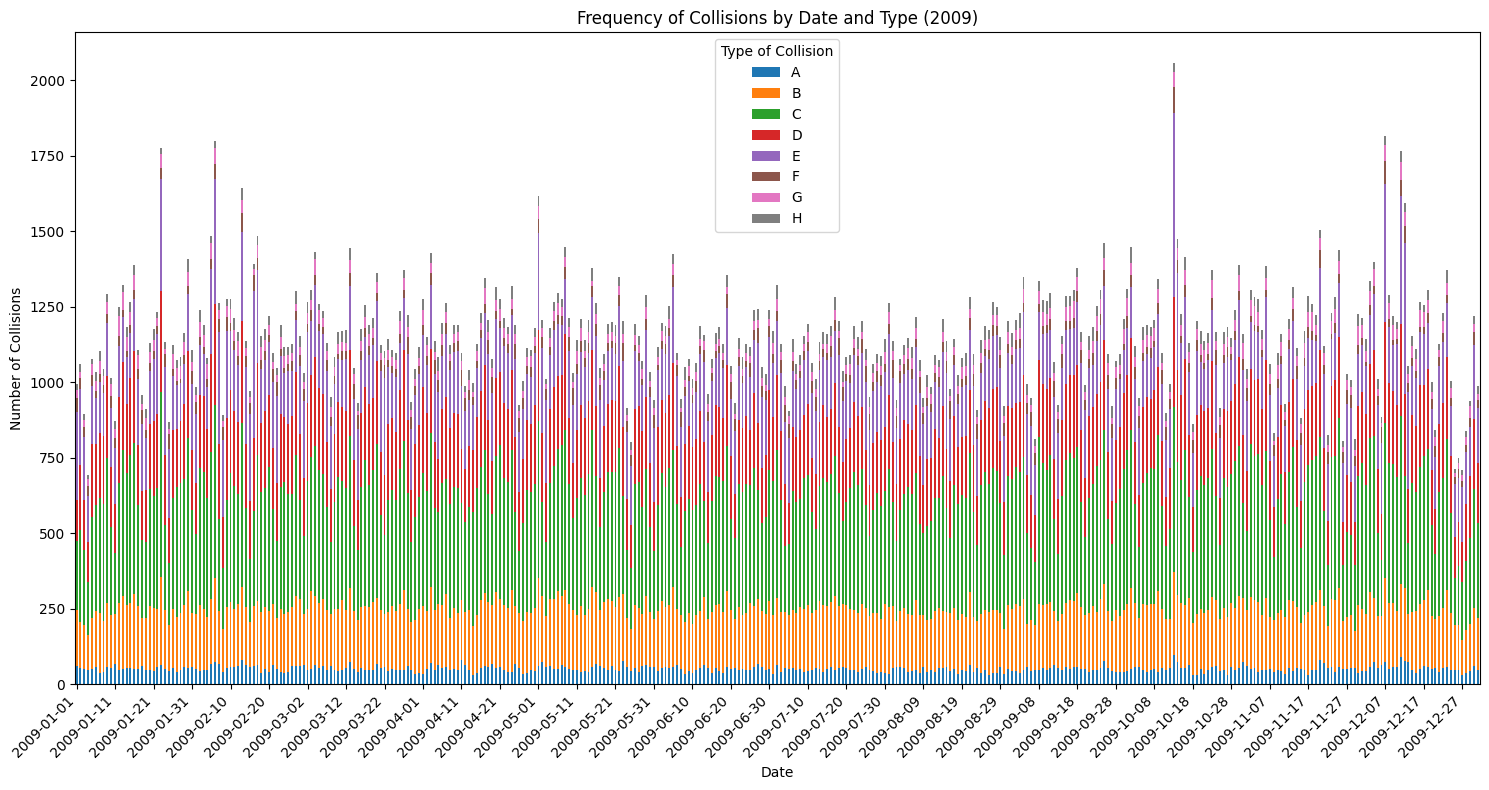

In [ ]:
# @title Collisions by Date and Type (2009)

collision_counts = collisions_df[collisions_df['COLLISION_DATE'].dt.year == 2009].groupby(['COLLISION_DATE', 'TYPE_OF_COLLISION']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(15, 8))
collision_counts.plot(kind='bar', stacked=True, ax=ax)
plt.xlabel('Date')
plt.ylabel('Number of Collisions')
plt.title('Frequency of Collisions by Date and Type (2009)')
plt.legend(title='Type of Collision')
xticks = ax.get_xticks()
selected_xticks = xticks[::10]
ax.set_xticks(selected_xticks)
ax.set_xticklabels([label.get_text().split(' ')[0] for label in ax.get_xticklabels()])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

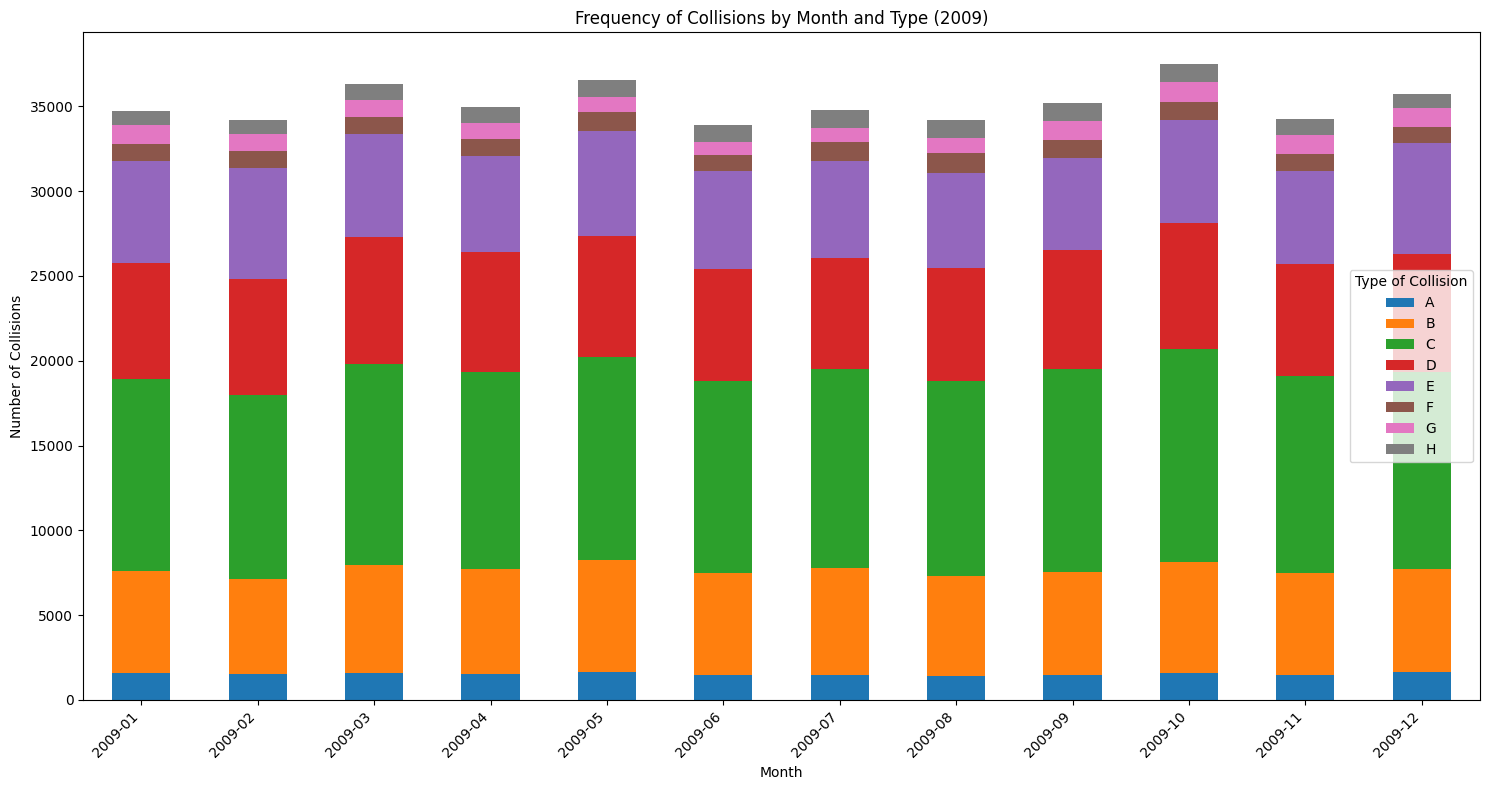

In [ ]:
# @title Collisions by Month and Type (2009)

collisions_df_new = collisions_df.copy()
collisions_df_new['MonthYear'] = collisions_df_new['COLLISION_DATE'].dt.to_period('M')
monthly_collision_counts = collisions_df_new[collisions_df_new['COLLISION_DATE'].dt.year == 2009].groupby(['MonthYear', 'TYPE_OF_COLLISION']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(15, 8))
monthly_collision_counts.plot(kind='bar', stacked=True, ax=ax)
plt.xlabel('Month')
plt.ylabel('Number of Collisions')
plt.title('Frequency of Collisions by Month and Type (2009)')
plt.legend(title='Type of Collision')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-69-90842aaf356b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  collisions_df_filtered['MonthYear'] = collisions_df_filtered['COLLISION_DATE'].dt.to_period('M')
<ipython-input-69-90842aaf356b>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  collisions_df_filtered['TYPE_OF_COLLISION_DESCRIPTION'] = collisions_df_filtered['TYPE_OF_COLLISION'].map(collision_type_mapping)


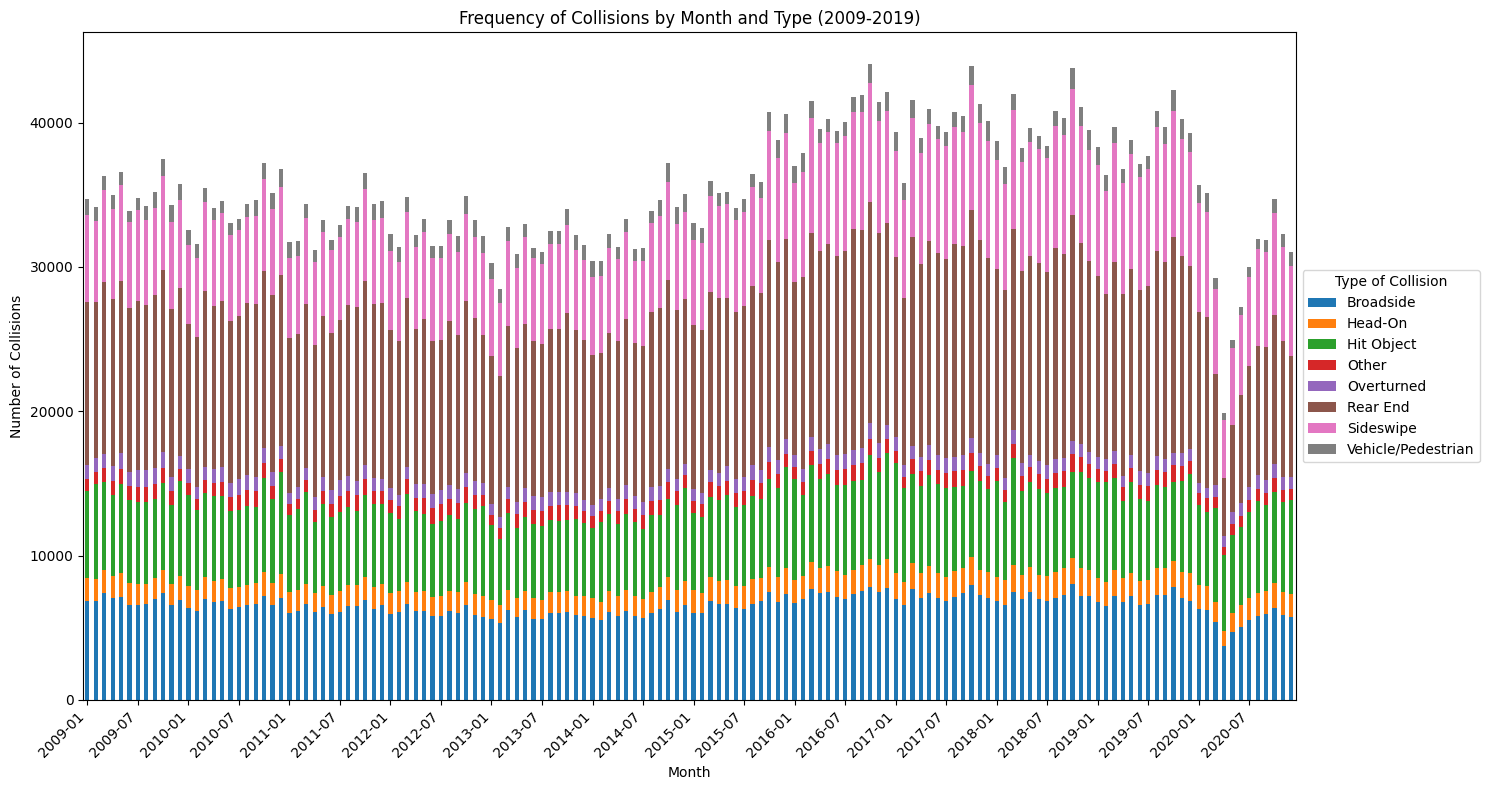

In [ ]:
# @title Collisions by Month and Type (2009-2020)

collisions_df_filtered = collisions_df[(collisions_df['COLLISION_DATE'].dt.year >= 2009) & (collisions_df['COLLISION_DATE'].dt.year <= 2020)]
collisions_df_filtered['MonthYear'] = collisions_df_filtered['COLLISION_DATE'].dt.to_period('M')

# The mapping dictionary
collision_type_mapping = {
    'A': 'Head-On',
    'B': 'Sideswipe',
    'C': 'Rear End',
    'D': 'Broadside',
    'E': 'Hit Object',
    'F': 'Overturned',
    'G': 'Vehicle/Pedestrian',
    'H': 'Other',
}

collisions_df_filtered['TYPE_OF_COLLISION_DESCRIPTION'] = collisions_df_filtered['TYPE_OF_COLLISION'].map(collision_type_mapping)
monthly_collision_counts = collisions_df_filtered.groupby(['MonthYear', 'TYPE_OF_COLLISION_DESCRIPTION']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(15, 8))
monthly_collision_counts.plot(kind='bar', stacked=True, ax=ax)
plt.xlabel('Month')
plt.ylabel('Number of Collisions')
plt.title('Frequency of Collisions by Month and Type (2009-2019)')
plt.legend(title='Type of Collision Description')
xticks = ax.get_xticks()
selected_xticks = xticks[::6]
ax.set_xticks(selected_xticks)
plt.xticks(rotation=45, ha='right')
ax.legend(title='Type of Collision', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

<ipython-input-70-b349d688872a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  collisions_df_filtered['Year'] = collisions_df_filtered['COLLISION_DATE'].dt.year


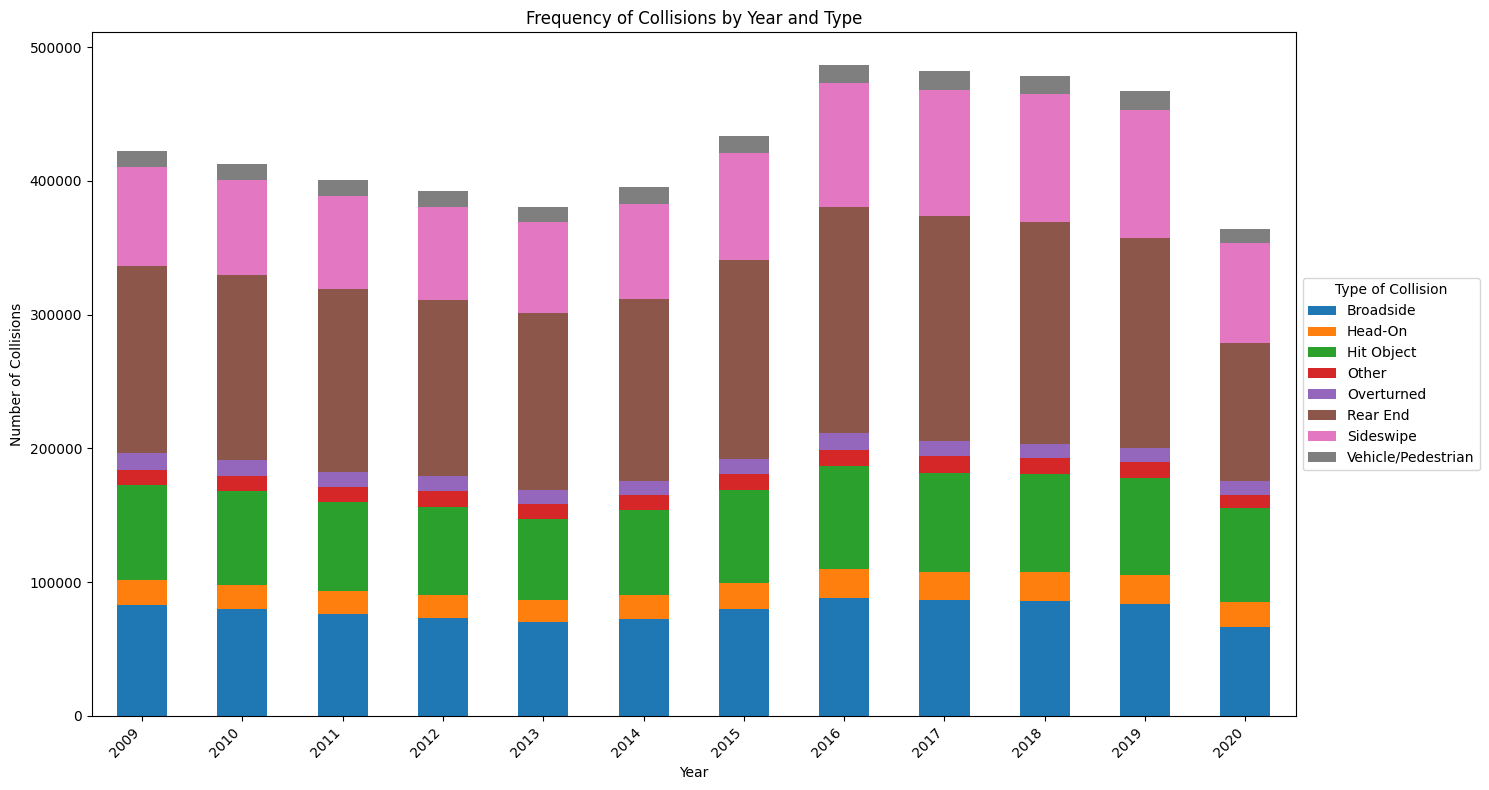

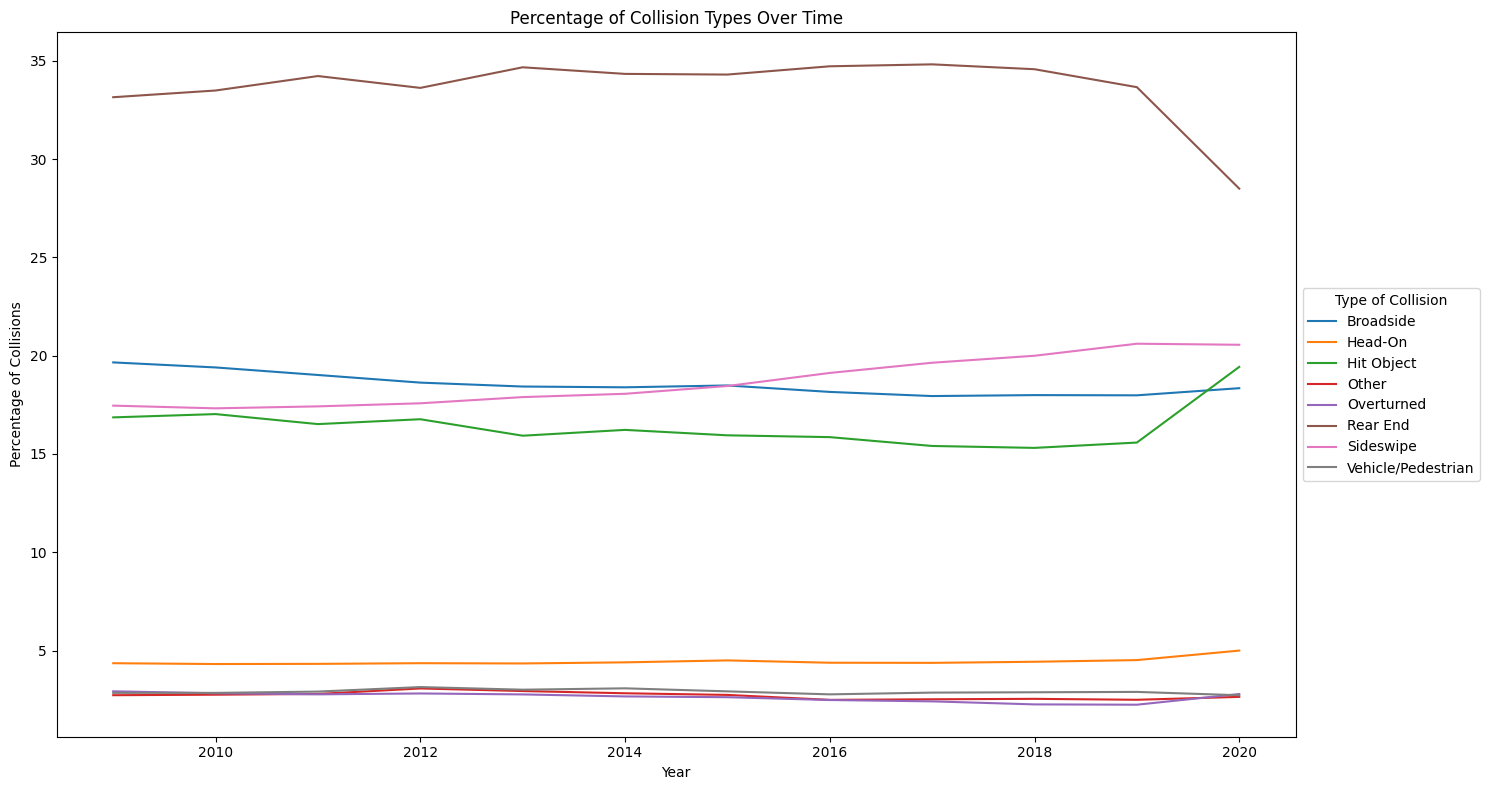

In [ ]:
# @title Collisions by Year and Type (2009-2020)

collisions_df_filtered['Year'] = collisions_df_filtered['COLLISION_DATE'].dt.year
yearly_collision_counts = collisions_df_filtered.groupby(['Year', 'TYPE_OF_COLLISION_DESCRIPTION']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(15, 8))
yearly_collision_counts.plot(kind='bar', stacked=True, ax=ax)
plt.xlabel('Year')
plt.ylabel('Number of Collisions')
plt.title('Frequency of Collisions by Year and Type')
plt.legend(title='Type of Collision', loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

total_collisions_by_year = yearly_collision_counts.sum(axis=1)
collision_type_percentages = yearly_collision_counts.div(total_collisions_by_year, axis=0) * 100
fig, ax = plt.subplots(figsize=(15, 8))
collision_type_percentages.plot(kind='line', ax=ax)
plt.xlabel('Year')
plt.ylabel('Percentage of Collisions')
plt.title('Percentage of Collision Types Over Time')
plt.legend(title='Type of Collision', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

In [ ]:
# Due to COVID-19 pandemic, the collision records from 2020 are messsed up.

collisions_df = collisions_df[(collisions_df['COLLISION_DATE'].dt.year >= 2009) & (collisions_df['COLLISION_DATE'].dt.year <= 2019)].copy()

In [ ]:
# @title Installation

!pip install skforecast

In [ ]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import grid_search_forecaster
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from math import sqrt

x = 24
yearToPredict = 2019

collisions_df_filtered = collisions_df[(collisions_df['COLLISION_DATE'].dt.year >= 2009) & (collisions_df['COLLISION_DATE'].dt.year <= yearToPredict)].copy()
collisions_df_filtered['YearMonth'] = collisions_df_filtered['COLLISION_DATE'].dt.to_period('M')
monthly_counts = collisions_df_filtered.groupby('YearMonth').size()

/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1135: UserWarning: Series has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1135: UserWarning: Series has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1197: UserWarning: `last_window` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1135: UserWarning: Series has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1135: UserWarning: Series has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(
/usr/local/lib/python3.10/dist-pa

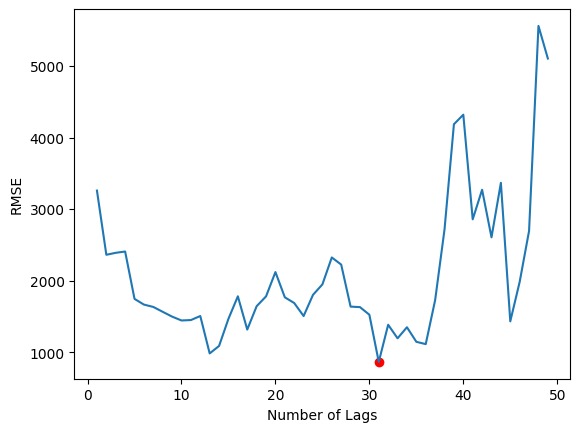

In [ ]:
list = {}

for k in range(1, 50):
  x = 24  # Using the last 24 months for testing
  forecaster = ForecasterAutoreg(
      regressor = Ridge(),
      lags = k
  )

  forecaster.fit(y=monthly_counts)

  predictions = forecaster.predict(steps=x)
  rmse = sqrt(mean_squared_error(monthly_counts.values[-x:], predictions))
  list[k] = rmse

plt.plot(list.keys(), list.values())
plt.xlabel('Number of Lags')
plt.ylabel('RMSE')
min_rmse = min(list.values())
min_k = min(list, key=list.get)
plt.scatter(min_k, min_rmse, color='red', alpha=1)

/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1135: UserWarning: Series has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1135: UserWarning: Series has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1197: UserWarning: `last_window` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(


RMSE: 863.5343008703942


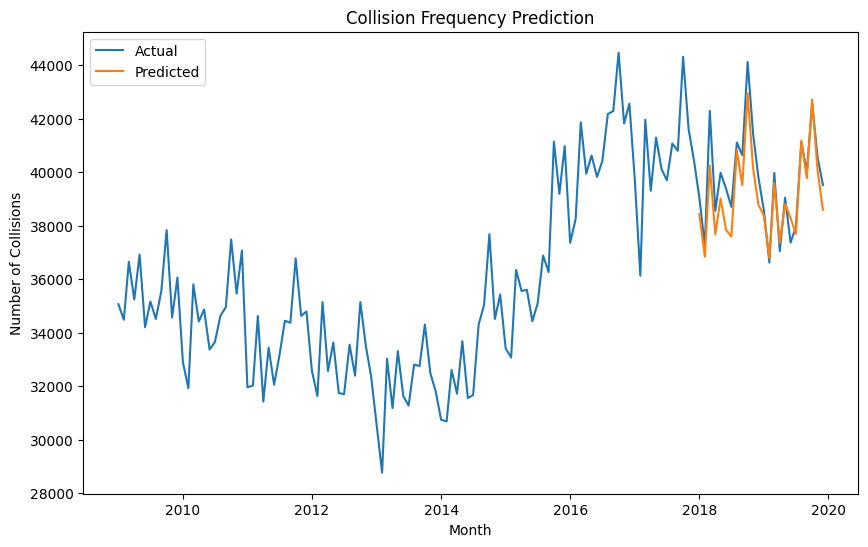

In [ ]:
x = 24  # Use the last 24 months for testing

forecaster = ForecasterAutoreg(
  regressor = Ridge(),
  lags = 31
)

forecaster.fit(y=monthly_counts)

predictions = forecaster.predict(steps=x)
rmse = sqrt(mean_squared_error(monthly_counts.values[-x:], predictions))
print("RMSE:", rmse)

plt.figure(figsize=(10,6))
plt.plot(monthly_counts.index.to_timestamp(), monthly_counts.values, label='Actual')
plt.plot(monthly_counts.index.to_timestamp()[-x:], predictions, label='Predicted')
plt.xlabel('Month')
plt.ylabel('Number of Collisions')
plt.title('Collision Frequency Prediction')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1197: UserWarning: `last_window` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(


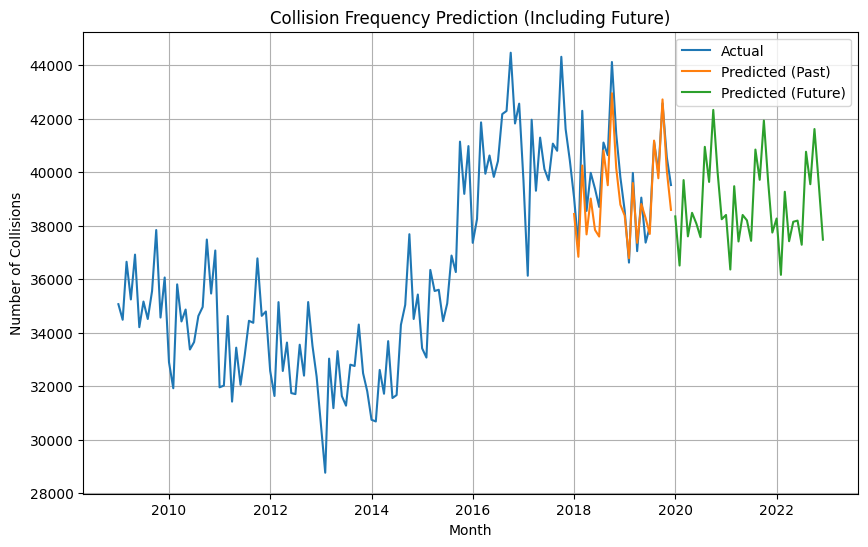

In [ ]:
# Extend the prediction range beyond yearToPredict
future_periods = 36
future_predictions = forecaster.predict(steps=x + future_periods)
future_dates = pd.date_range(start=monthly_counts.index.to_timestamp()[-1] + pd.offsets.MonthBegin(1), periods=future_periods, freq='MS')

plt.figure(figsize=(10, 6))
plt.plot(monthly_counts.index.to_timestamp(), monthly_counts.values, label='Actual')
plt.plot(monthly_counts.index.to_timestamp()[-x:], predictions, label='Predicted (Past)')  # Plot past predictions
plt.plot(future_dates, future_predictions[-future_periods:], label='Predicted (Future)')  # Plot future predictions
plt.xlabel('Month')
plt.ylabel('Number of Collisions')
plt.title('Collision Frequency Prediction (Including Future)')
plt.grid(True)
plt.legend()
plt.show()

1. https://medium.com/@mouse3mic3/a-practical-guide-on-scikit-learn-for-time-series-forecasting-bbd15b611a5d
2. https://skforecast.org/0.13.0/quick-start/quick-start-skforecast

PRIMARY_RD  SECONDARY_RD  
RT 60       GRAND AV          2278
RT 80       POWELL ST         1607
RT 405      SEAL BEACH BL     1598
RT 5        4TH ST            1508
RT 91       IMPERIAL HWY      1350
RT 605      TELEGRAPH RD      1273
RT 5        MAIN ST           1248
RT 91       GREEN RIVER RD    1224
RT 605      VALLEY BL         1193
RT 880      RT 92             1172
Name: CASE_ID, dtype: int64


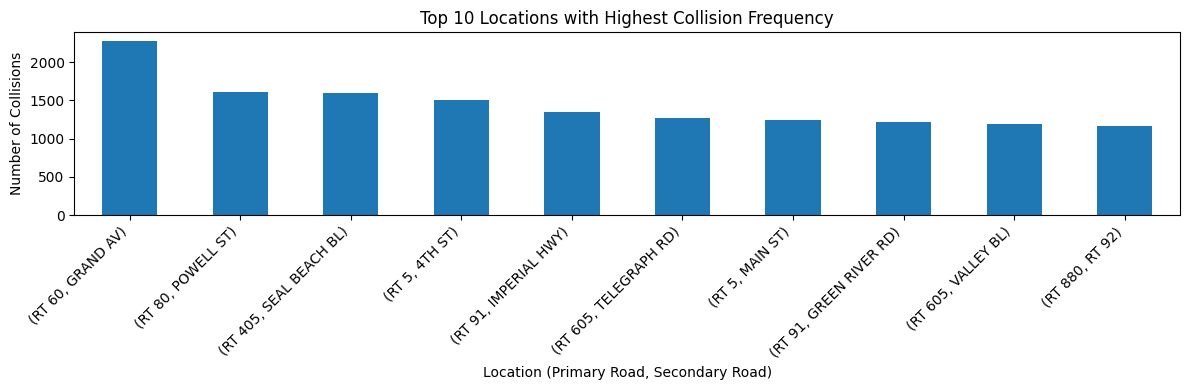

In [ ]:
location_collisions = collisions_df.groupby(['PRIMARY_RD', 'SECONDARY_RD'])['CASE_ID'].count().sort_values(ascending=False)

print(location_collisions.head(10))

plt.figure(figsize=(12, 4))
location_collisions.head(10).plot(kind='bar')
plt.xlabel('Location (Primary Road, Secondary Road)')
plt.ylabel('Number of Collisions')
plt.title('Top 10 Locations with Highest Collision Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

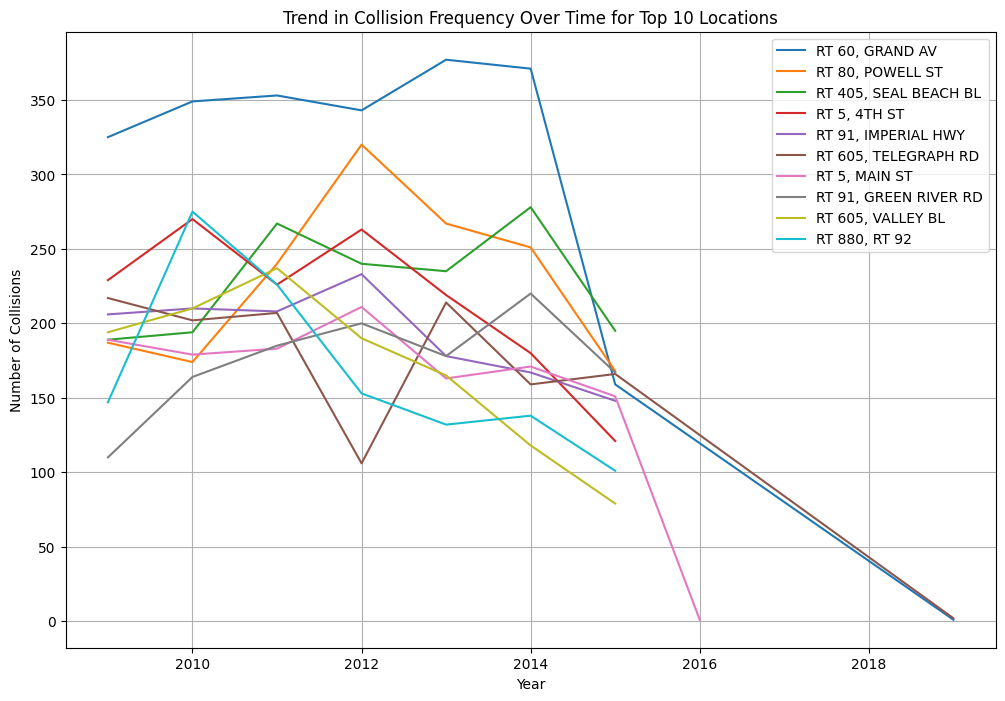

In [ ]:
location_collisions = collisions_df.groupby(['PRIMARY_RD', 'SECONDARY_RD'])['CASE_ID'].count().sort_values(ascending=False)
top_10_locations = location_collisions.head(10).index

plt.figure(figsize=(12, 8))

for location in top_10_locations:
  location_collisions = collisions_df[(collisions_df['PRIMARY_RD'] == location[0]) & (collisions_df['SECONDARY_RD'] == location[1])]
  yearly_collisions_location = location_collisions['COLLISION_DATE'].dt.year.value_counts().sort_index()
  plt.plot(yearly_collisions_location.index, yearly_collisions_location.values, label=f'{location[0]}, {location[1]}')

plt.xlabel('Year')
plt.ylabel('Number of Collisions')
plt.title('Trend in Collision Frequency Over Time for Top 10 Locations')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
yearly_location_collisions = collisions_df.groupby([collisions_df['COLLISION_DATE'].dt.year, 'PRIMARY_RD', 'SECONDARY_RD'])['CASE_ID'].count()
top_locations_by_year = yearly_location_collisions.groupby(by=['COLLISION_DATE'])
top_locations_by_year = top_locations_by_year.apply(lambda x: x.sort_values(ascending=False).head(1))
top_locations_by_year

,,,,CASE_ID
COLLISION_DATE,COLLISION_DATE,PRIMARY_RD,SECONDARY_RD,
2009,2009,RT 60,GRAND AV,325
2010,2010,RT 60,GRAND AV,349
2011,2011,RT 60,GRAND AV,353
2012,2012,RT 60,GRAND AV,343
2013,2013,RT 60,GRAND AV,377
2014,2014,RT 60,GRAND AV,371
2015,2015,RT 15,RT 138,230
2016,2016,SR-60 W/B (POMONA FREEWAY),GRAND AVE,283
2017,2017,SR-60 W/B (POMONA FWY),GRAND AVE,202


Interesting Links:
- https://www.diamondbarca.gov/966/SR-57-SR-60-Interchange-Improvement
- https://maps.app.goo.gl/DAeQUqSfCx9WkdYCA

In [ ]:
top_locations_by_year = yearly_location_collisions.groupby(by=['COLLISION_DATE']).idxmax()

In [ ]:
for year, location in top_locations_by_year.items():
  location_collisions = collisions_df[
      (collisions_df['COLLISION_DATE'].dt.year == year) &
      (collisions_df['PRIMARY_RD'] == location[1]) &
      (collisions_df['SECONDARY_RD'] == location[2])
  ]
  top_pcf_viol_category = location_collisions['PCF_VIOL_CATEGORY'].value_counts().index[0]
  print(f"Year: {year}, Location: {location[1]}, {location[2]}, Top PCF Violation Category: {top_pcf_viol_category}")

Year: 2009, Location: RT 60, GRAND AV, Top PCF Violation Category: 3.0
Year: 2010, Location: RT 60, GRAND AV, Top PCF Violation Category: 3.0
Year: 2011, Location: RT 60, GRAND AV, Top PCF Violation Category: 3.0
Year: 2012, Location: RT 60, GRAND AV, Top PCF Violation Category: 3.0
Year: 2013, Location: RT 60, GRAND AV, Top PCF Violation Category: 3.0
Year: 2014, Location: RT 60, GRAND AV, Top PCF Violation Category: 3.0
Year: 2015, Location: RT 15, RT 138, Top PCF Violation Category: 3.0
Year: 2016, Location: SR-60 W/B (POMONA FREEWAY), GRAND AVE, Top PCF Violation Category: 3.0
Year: 2017, Location: SR-60 W/B (POMONA FWY), GRAND AVE, Top PCF Violation Category: 3.0
Year: 2018, Location: SR-60 W/B (POMONA FWY), GRAND AVE, Top PCF Violation Category: 3.0
Year: 2019, Location: SR-60 W/B (POMONA FWY), GRAND AVE, Top PCF Violation Category: 3.0


In [ ]:
for year, location in top_locations_by_year.items():
  location_collisions = collisions_df[
      (collisions_df['COLLISION_DATE'].dt.year == year) &
      (collisions_df['PRIMARY_RD'] == location[1]) &
      (collisions_df['SECONDARY_RD'] == location[2])
  ]
  top_collision_type = location_collisions['TYPE_OF_COLLISION'].value_counts().index[0]
  print(f"Year: {year}, Location: {location[1]}, {location[2]}, Top Collision Type: {top_collision_type}")

Year: 2009, Location: RT 60, GRAND AV, Top Collision Type: C
Year: 2010, Location: RT 60, GRAND AV, Top Collision Type: C
Year: 2011, Location: RT 60, GRAND AV, Top Collision Type: C
Year: 2012, Location: RT 60, GRAND AV, Top Collision Type: C
Year: 2013, Location: RT 60, GRAND AV, Top Collision Type: C
Year: 2014, Location: RT 60, GRAND AV, Top Collision Type: C
Year: 2015, Location: RT 15, RT 138, Top Collision Type: C
Year: 2016, Location: SR-60 W/B (POMONA FREEWAY), GRAND AVE, Top Collision Type: C
Year: 2017, Location: SR-60 W/B (POMONA FWY), GRAND AVE, Top Collision Type: C
Year: 2018, Location: SR-60 W/B (POMONA FWY), GRAND AVE, Top Collision Type: C
Year: 2019, Location: SR-60 W/B (POMONA FWY), GRAND AVE, Top Collision Type: C


In [ ]:
# @title End of Notebook

import google, json, nbformat
raw_notebook = google.colab._message.blocking_request("get_ipynb", timeout_sec=30)["ipynb"]
with open("_NOTEBOOK.ipynb", "w", encoding="utf-8") as ipynb_file:
  ipynb_file.write(json.dumps(raw_notebook))
!jupyter nbconvert --to html --log-level WARN _NOTEBOOK.ipynb
google.colab.files.download("_NOTEBOOK.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>